# Exercise: bivariate uncorrelated normal distribution

### This notebook is licensed  under [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1) © 2024 by Xavier Luri (ICCUB)

We generate a two-dimensional data samplw, that is, each data point is a pair $(x_1,x_2)$. The distributions of $x_1$ and $x_2$ are normal, and the variables are independent (the covariance matrix is diagonal). Determine using ML the mean and variance in each axis.

The PDF is in this case:

$f(\vec{x} | \vec{\theta}) = f(x_1,x_2 | \mu_1,\sigma_1, \mu_2,\sigma_2 ) = \frac{1}{2 \pi \sigma_1 \sigma_2 } e^{-\frac{(x_1-\mu_1)^2}{2 \sigma_1^2}} e^{-\frac{(x_2-\mu_2)^2}{2 \sigma_2^2}}$

We generate the sample here:

In [1]:
# General imports
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.optimize as opt
import statistics as st

from scipy.stats import norm
from scipy.stats import multivariate_normal

x1:  0.9186399284395285 2.0500290585295873
x2:  4.733183096381505 3.8665810170075745


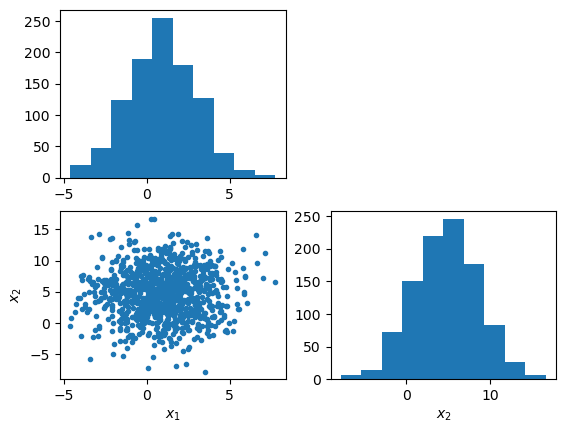

In [2]:
# Means
mu= [1,5]

# Covariance matrix (diagonal, uncorrelated x1 and x2). Diagonal contains the variances, so sigma**2
sigma= [2,4]
cov_matrix= np.diag([sigma[0]**2,sigma[1]**2])

# Create distribution
mv_normal= multivariate_normal(mean=mu, cov= cov_matrix)

# Generate sample
x= mv_normal.rvs(size=1000)

# Check means and sigma
print("x1: ", st.mean(x[:,0]), st.stdev(x[:,0]))
print("x2: ", st.mean(x[:,1]), st.stdev(x[:,1]))

# Generate plot
plt.subplot(2,2,3)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.plot(x[:,0],x[:,1],".")

plt.subplot(2,2,1)
plt.hist(x[:,0])

plt.subplot(2,2,4)
plt.xlabel('$x_2$')
_ = plt.hist(x[:,1])

Now let's implement our own minimization. First we define log-PDF and log-likelihood

In [3]:
def log_f(x,theta):
    '''This function implements the PDF, a bivariate normal distribution with a diagonal correlation matrix
    * x is the vector of measured values (x1,x2)
    * theta is the vector of the PDF parameters: theta[0] is $\mu1$, theta[1] is $\sigma1$, 
                                                 theta[2] is $\mu2$, theta[3] is $\sigma2$'''
    
    return -(x[0]-theta[0])**2 / (2*theta[1]**2) - math.log( theta[1] * math.sqrt(2*math.pi) ) \
           -(x[1]-theta[2])**2 / (2*theta[3]**2) - math.log( theta[3] * math.sqrt(2*math.pi) )

In [4]:
def minus_log_L(theta):
    '''Minus log-likelihood function. It uses as arguments the parameters of the PDF (which will be passed by the
    minimization routine, and assumes that the vector of observed values x is defined externally as a global variable. '''
 
    logL= 0
    
    for value in x:
        logL= logL + log_f(value,theta)
        
    return -logL

Minimize -logL:

In [5]:
# Initial guess for the values of the PDF parameters, not too far of the true values
theta_guess=[mu[0]+1,sigma[0]+1, mu[1]-1, sigma[1]+1]

# Minimization of our (minus) log-likelihood function
result= opt.minimize(minus_log_L, theta_guess, tol=1.e-4, bounds=( (None,None), (0,None), (None,None), (0,None) ) )
print(result)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 4907.24537098218
        x: [ 9.081e-01  2.054e+00  4.673e+00  3.869e+00]
      nit: 6
      jac: [-2.502e+00  2.582e+00 -4.047e+00  5.281e-01]
     nfev: 45
     njev: 9
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>


Check shape of log-likelihood: we fix the covariance matrix and do a contour plot just for the means. It may take a while...

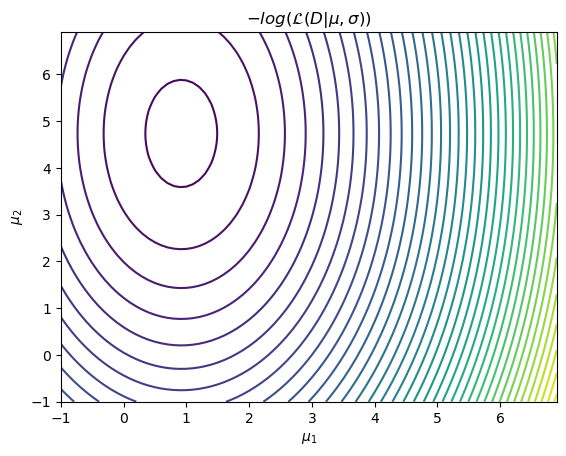

In [6]:
theta=[mu[0],sigma[0], mu[1], sigma[1]] # We set the "true" values used to generate the sample

min_mu= min(mu) -2
max_mu= max(mu) +2

# Grid of mu1 values
theta_0= [m for m in np.arange(min_mu,max_mu,0.1)]

# Grid of mu2 values
theta_2= [m for m in np.arange(min_mu,max_mu,0.1)]

# 2D grid of (mu1,mu2) values
z = [ [minus_log_L([m1,sigma[0], m2, sigma[1]]) for m1 in theta_0] for m2 in theta_2]

# Contour plot
plt.xlabel("$\mu_1$")
plt.ylabel("$\mu_2$")
plt.title("$-log( \mathcal{L}(D | \mu, \sigma) )$")
_= plt.contour(theta_0,theta_2,z,45)

___Note___: _scipy.stats.multivariate_normal_ sholud have a fit method for scipy 1.12 onwards, but for some reason it does not

In [16]:
result= mv_normal.fit(x)
print(result)

AttributeError: 'multivariate_normal_frozen' object has no attribute 'fit'

___Suggestion:___ extend the above example to a bivariate normal distribution with a correlation coefficient $\rho$

https://mathworld.wolfram.com/BivariateNormalDistribution.html